# Classificação de imagens em Pyhon

Os arquivos de dados **train.csv** e **test.csv** contém imagens em escala de cinza, de dígitos desenhados à mão, de zero a nove. Cada imagem é de 28 pixels de altura e 28 pixels de largura, para um total de 784 pixels no total. Cada pixel tem um pixel de valor único associado a ele, indicando a claridade ou escuridão daquele pixel, com números mais elevados significam mais escura. Este valor de pixel é um número inteiro entre 0 e 255, inclusive. O conjunto de dados de treinamento, (train.csv), tem 785 colunas. A primeira coluna, chamado **marcador**, é o dígito que foi desenhado pelo usuário. O restante das colunas contêm os valores de pixel da imagem associada.

In [1]:
# Importando pacotes e definindo parâmetros
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import time

%matplotlib inline
#plt.rcParams['figure.figsize'] = (16, 12)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
%%time

# Criando a fun¸c~ao para carregar o arquivo csv para um array numpy
def load_data(data_dir):
    train_data = open(data_dir + "train.csv").read()
    train_data = train_data.split("\n")[1:-1]
    train_data = [i.split(",") for i in train_data]

    # print(len(train_data))
    X_train = np.array([[int(i[j]) for j in range(1,len(i))] for i in train_data])
    y_train = np.array([int(i[0]) for i in train_data])

    # print(X_train.shape, y_train.shape)
    test_data = open(data_dir + "test.csv").read()
    test_data = test_data.split("\n")[1:-1]
    test_data = [i.split(",") for i in test_data]
    
    # print(len(test_data))
    X_test = np.array([[int(i[j]) for j in range(0,len(i))] for i in test_data])
    # print(X_test.shape)
    return X_train, y_train, X_test

CPU times: user 7 µs, sys: 1e+03 ns, total: 8 µs
Wall time: 14.8 µs


In [3]:
# Criando uma classe
class simple_knn():
    "a simple kNN with L2 distance"
    def __init__(self):
        pass

    def train(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X, k=1):
        dists = self.compute_distances(X)
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        
        for i in range(num_test):
            k_closest_y = []
            labels = self.y_train[np.argsort(dists[i,:])].flatten()
            # Encontrando os labels mais pr´oximos
            k_closest_y = labels[:k]
            c = Counter(k_closest_y)
            y_pred[i] = c.most_common(1)[0][0]
        
        return(y_pred)

    def compute_distances(self, X):
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dot_pro = np.dot(X, self.X_train.T)
        sum_square_test = np.square(X).sum(axis = 1)
        sum_square_train = np.square(self.X_train).sum(axis = 1)
        dists = np.sqrt(-2 * dot_pro + sum_square_train + np.matrix(sum_square_test).T)
        
        return(dists)

In [4]:
%%time

# Carregando os arquivos csv nas variáveis de treino e de teste

data_dir = "data/MNIST/"
X_train, y_train, X_test = load_data(data_dir)

CPU times: user 24 s, sys: 1.86 s, total: 25.9 s
Wall time: 30.8 s


In [5]:
# Imprimindo as variáveis
print(X_train.shape, y_train.shape, X_test.shape)

(42000, 784) (42000,) (28000, 784)


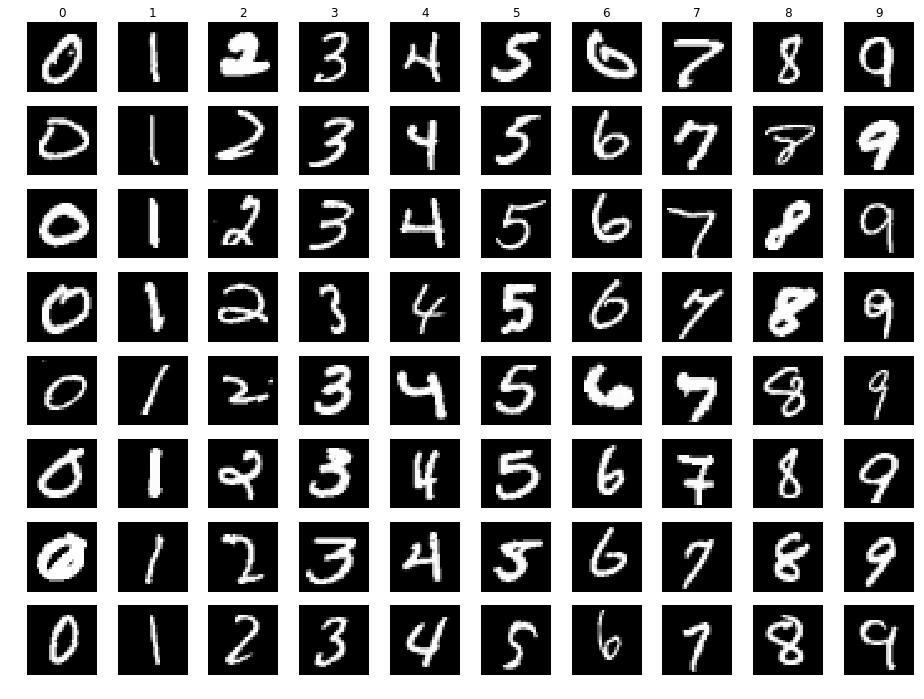

In [6]:
# Distribui as imagens dos dígitos randomicamente através do dataset de treino

classes = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
num_classes = len(classes)
samples = 8
plt.figure(figsize=(16,12))

for y, cls in enumerate(classes):
    idxs = np.nonzero([i == y for i in y_train])
    idxs = np.random.choice(idxs[0], samples, replace = False)

    for i , idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples, num_classes, plt_idx)
        plt.imshow(X_train[idx].reshape((28, 28)))
        plt.axis("off")

        if i == 0:
            plt.title(cls)
            
plt.show()

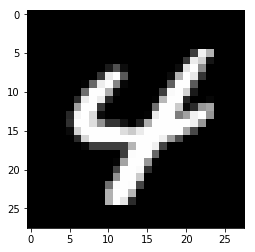

In [7]:
# Visualizando uma imagem de teste aleatória, reconhecida pelo modelo
plt.figure(figsize=(4,4))
plt.imshow(X_test[18106].reshape((28, 28)))

In [8]:
# Fazendo previsões para as imagens de teste, usando classificador kNN
batch_size = 2000
k = 1

classifier = simple_knn()
classifier.train(X_train, y_train)

In [9]:
%%time

# Processando o modelo preditivo na primeira metade do dataset de teste

predictions = []

for i in range(int(len(X_test)/(2*batch_size))):
    print("Processando " + str(i+1) + "/" + str(int(len(X_test)/batch_size)) + "...")
    tic = time.time()
    predts = classifier.predict(X_test[i * batch_size:(i+1) * batch_size], k)
    toc = time.time()
    predictions = predictions + list(predts)
    print("Processamento concluído em " + str(toc-tic) + " segundos.\n")

print("Análise preditiva concluída!\n")

Processando 1/14...
Processamento concluído em 87.04986619949341 segundos.

Processando 2/14...
Processamento concluído em 88.0601258277893 segundos.

Processando 3/14...
Processamento concluído em 87.99934530258179 segundos.

Processando 4/14...
Processamento concluído em 88.25690603256226 segundos.

Processando 5/14...
Processamento concluído em 85.48057222366333 segundos.

Processando 6/14...
Processamento concluído em 85.19331169128418 segundos.

Processando 7/14...
Processamento concluído em 86.93134784698486 segundos.

Análise preditiva concluída!

CPU times: user 9min 50s, sys: 18.9 s, total: 10min 9s
Wall time: 10min 8s


In [10]:
%%time

# Processando o modelo preditivo na segunda metade do dataset de teste

for i in range(int(len(X_test)/(2*batch_size)), int(len(X_test)/batch_size)):
    print("Processando " + str(i+1) + "/" + str(int(len(X_test)/batch_size)) + "...")
    tic = time.time()
    predts = classifier.predict(X_test[i * batch_size:(i+1) * batch_size], k)
    toc = time.time()
    predictions = predictions + list(predts)
    print("Processamento concluído em " + str(toc-tic) + " segundos.\n")
    
print("Análise preditiva concluída!\n")

Processando 8/14...
Processamento concluído em 87.98802375793457 segundos.

Processando 9/14...
Processamento concluído em 87.40748071670532 segundos.

Processando 10/14...
Processamento concluído em 88.22578978538513 segundos.

Processando 11/14...
Processamento concluído em 85.45631003379822 segundos.

Processando 12/14...
Processamento concluído em 87.09128093719482 segundos.

Processando 13/14...
Processamento concluído em 88.07956218719482 segundos.

Processando 14/14...
Processamento concluído em 88.01809430122375 segundos.

Análise preditiva concluída!

CPU times: user 9min 53s, sys: 18.9 s, total: 10min 12s
Wall time: 10min 12s


In [13]:
%%time

print("ImageId,Label\n")

for i in range(len(predictions)):
    print(str(i+1) + "," + str(int(predictions[i])))

ImageId,Label

1,2
2,0
3,9
4,0
5,3
6,7
7,0
8,3
9,0
10,3
11,5
12,7
13,4
14,0
15,4
16,3
17,3
18,1
19,9
20,0
21,9
22,1
23,1
24,5
25,7
26,4
27,2
28,7
29,9
30,7
31,7
32,5
33,4
34,2
35,6
36,2
37,5
38,5
39,1
40,6
41,7
42,7
43,4
44,9
45,8
46,7
47,8
48,2
49,6
50,7
51,6
52,8
53,8
54,3
55,8
56,2
57,1
58,2
59,2
60,0
61,4
62,1
63,7
64,0
65,0
66,0
67,1
68,9
69,0
70,1
71,6
72,5
73,8
74,8
75,2
76,8
77,8
78,9
79,2
80,3
81,5
82,4
83,1
84,0
85,9
86,2
87,4
88,3
89,6
90,7
91,2
92,0
93,6
94,6
95,1
96,4
97,3
98,9
99,7
100,4
101,0
102,9
103,2
104,0
105,7
106,3
107,0
108,5
109,0
110,8
111,0
112,0
113,4
114,7
115,1
116,7
117,1
118,1
119,3
120,3
121,3
122,7
123,2
124,8
125,6
126,3
127,8
128,7
129,8
130,4
131,3
132,5
133,6
134,0
135,0
136,0
137,3
138,1
139,5
140,6
141,4
142,3
143,4
144,5
145,5
146,8
147,7
148,7
149,2
150,8
151,4
152,3
153,5
154,6
155,5
156,3
157,7
158,5
159,7
160,8
161,3
162,0
163,4
164,5
165,1
166,3
167,7
168,6
169,3
170,0
171,2
172,7
173,8
174,6
175,1
176,3
177,7
178,7
179,1
180,2
181,4
182,8
1

1837,0
1838,9
1839,0
1840,6
1841,6
1842,2
1843,4
1844,3
1845,0
1846,2
1847,7
1848,1
1849,5
1850,8
1851,5
1852,8
1853,8
1854,4
1855,7
1856,4
1857,3
1858,6
1859,5
1860,7
1861,3
1862,1
1863,6
1864,7
1865,1
1866,3
1867,1
1868,8
1869,5
1870,1
1871,5
1872,2
1873,2
1874,6
1875,9
1876,0
1877,2
1878,1
1879,2
1880,7
1881,4
1882,4
1883,9
1884,3
1885,0
1886,4
1887,5
1888,1
1889,9
1890,6
1891,9
1892,7
1893,6
1894,5
1895,0
1896,6
1897,1
1898,3
1899,8
1900,4
1901,0
1902,0
1903,0
1904,3
1905,7
1906,9
1907,8
1908,6
1909,9
1910,9
1911,1
1912,5
1913,0
1914,9
1915,1
1916,7
1917,9
1918,0
1919,8
1920,9
1921,0
1922,6
1923,9
1924,2
1925,4
1926,2
1927,1
1928,9
1929,4
1930,4
1931,8
1932,8
1933,6
1934,5
1935,6
1936,1
1937,3
1938,0
1939,9
1940,3
1941,9
1942,7
1943,0
1944,7
1945,6
1946,5
1947,8
1948,6
1949,6
1950,0
1951,7
1952,4
1953,5
1954,3
1955,7
1956,7
1957,8
1958,5
1959,5
1960,5
1961,5
1962,3
1963,6
1964,8
1965,3
1966,6
1967,1
1968,9
1969,8
1970,0
1971,9
1972,4
1973,9
1974,5
1975,8
1976,4
1977,0
1978,9
1979,3

3337,3
3338,2
3339,1
3340,7
3341,0
3342,9
3343,4
3344,2
3345,8
3346,6
3347,8
3348,5
3349,2
3350,8
3351,4
3352,8
3353,1
3354,4
3355,3
3356,7
3357,1
3358,2
3359,1
3360,5
3361,3
3362,6
3363,7
3364,2
3365,4
3366,7
3367,6
3368,9
3369,1
3370,2
3371,8
3372,6
3373,8
3374,7
3375,6
3376,2
3377,0
3378,1
3379,8
3380,0
3381,6
3382,3
3383,9
3384,7
3385,3
3386,1
3387,9
3388,4
3389,6
3390,9
3391,7
3392,1
3393,7
3394,8
3395,1
3396,3
3397,5
3398,1
3399,2
3400,7
3401,6
3402,6
3403,5
3404,0
3405,4
3406,5
3407,9
3408,6
3409,5
3410,4
3411,1
3412,2
3413,4
3414,1
3415,3
3416,4
3417,0
3418,1
3419,8
3420,0
3421,2
3422,9
3423,2
3424,7
3425,7
3426,9
3427,1
3428,4
3429,7
3430,3
3431,3
3432,9
3433,9
3434,1
3435,3
3436,7
3437,8
3438,4
3439,9
3440,7
3441,9
3442,7
3443,1
3444,5
3445,4
3446,0
3447,0
3448,0
3449,3
3450,5
3451,8
3452,3
3453,0
3454,4
3455,1
3456,2
3457,8
3458,1
3459,0
3460,8
3461,8
3462,3
3463,4
3464,4
3465,9
3466,3
3467,2
3468,7
3469,2
3470,6
3471,8
3472,1
3473,0
3474,1
3475,8
3476,1
3477,3
3478,7
3479,4

4836,5
4837,9
4838,2
4839,4
4840,9
4841,5
4842,8
4843,9
4844,9
4845,9
4846,1
4847,8
4848,0
4849,0
4850,9
4851,0
4852,8
4853,2
4854,0
4855,9
4856,8
4857,6
4858,2
4859,3
4860,7
4861,0
4862,6
4863,3
4864,8
4865,1
4866,9
4867,2
4868,0
4869,4
4870,2
4871,8
4872,9
4873,4
4874,3
4875,6
4876,0
4877,2
4878,0
4879,4
4880,5
4881,3
4882,4
4883,1
4884,2
4885,2
4886,4
4887,9
4888,4
4889,3
4890,2
4891,1
4892,9
4893,1
4894,6
4895,1
4896,0
4897,3
4898,4
4899,0
4900,1
4901,9
4902,4
4903,0
4904,0
4905,4
4906,8
4907,1
4908,9
4909,2
4910,3
4911,3
4912,4
4913,3
4914,7
4915,0
4916,7
4917,9
4918,7
4919,4
4920,5
4921,9
4922,7
4923,7
4924,0
4925,4
4926,2
4927,2
4928,9
4929,8
4930,5
4931,0
4932,4
4933,9
4934,8
4935,8
4936,2
4937,4
4938,1
4939,4
4940,1
4941,4
4942,1
4943,0
4944,9
4945,9
4946,5
4947,6
4948,4
4949,9
4950,2
4951,2
4952,6
4953,0
4954,3
4955,0
4956,2
4957,3
4958,0
4959,4
4960,0
4961,1
4962,0
4963,8
4964,4
4965,9
4966,3
4967,7
4968,1
4969,4
4970,1
4971,7
4972,6
4973,0
4974,7
4975,7
4976,1
4977,5
4978,0

6336,0
6337,4
6338,1
6339,8
6340,2
6341,1
6342,3
6343,4
6344,1
6345,7
6346,7
6347,2
6348,9
6349,3
6350,8
6351,6
6352,3
6353,2
6354,2
6355,6
6356,3
6357,5
6358,7
6359,1
6360,1
6361,1
6362,7
6363,7
6364,8
6365,2
6366,9
6367,7
6368,3
6369,1
6370,5
6371,6
6372,4
6373,4
6374,4
6375,1
6376,9
6377,0
6378,8
6379,4
6380,1
6381,4
6382,6
6383,2
6384,3
6385,8
6386,6
6387,7
6388,4
6389,2
6390,5
6391,9
6392,0
6393,0
6394,0
6395,8
6396,6
6397,5
6398,2
6399,3
6400,0
6401,9
6402,2
6403,5
6404,4
6405,8
6406,6
6407,7
6408,6
6409,1
6410,4
6411,0
6412,1
6413,6
6414,1
6415,4
6416,4
6417,6
6418,1
6419,1
6420,4
6421,1
6422,5
6423,7
6424,5
6425,4
6426,2
6427,5
6428,1
6429,0
6430,6
6431,7
6432,1
6433,1
6434,4
6435,4
6436,0
6437,5
6438,6
6439,0
6440,8
6441,2
6442,7
6443,4
6444,9
6445,9
6446,0
6447,2
6448,2
6449,5
6450,3
6451,0
6452,3
6453,1
6454,0
6455,1
6456,1
6457,2
6458,8
6459,8
6460,6
6461,2
6462,6
6463,2
6464,0
6465,2
6466,9
6467,7
6468,3
6469,3
6470,8
6471,5
6472,0
6473,6
6474,6
6475,5
6476,8
6477,3
6478,2

7673,7
7674,9
7675,1
7676,3
7677,1
7678,4
7679,8
7680,7
7681,5
7682,8
7683,0
7684,0
7685,0
7686,0
7687,6
7688,9
7689,7
7690,8
7691,4
7692,9
7693,6
7694,7
7695,4
7696,0
7697,7
7698,6
7699,8
7700,1
7701,4
7702,1
7703,3
7704,0
7705,8
7706,7
7707,8
7708,1
7709,3
7710,4
7711,1
7712,5
7713,2
7714,3
7715,0
7716,7
7717,1
7718,0
7719,3
7720,8
7721,5
7722,0
7723,3
7724,1
7725,5
7726,4
7727,5
7728,3
7729,8
7730,6
7731,6
7732,6
7733,1
7734,4
7735,7
7736,3
7737,7
7738,8
7739,6
7740,0
7741,8
7742,6
7743,6
7744,9
7745,5
7746,5
7747,7
7748,2
7749,6
7750,1
7751,5
7752,6
7753,0
7754,3
7755,2
7756,6
7757,6
7758,1
7759,5
7760,9
7761,5
7762,4
7763,6
7764,1
7765,1
7766,7
7767,2
7768,0
7769,5
7770,8
7771,1
7772,0
7773,4
7774,8
7775,6
7776,1
7777,9
7778,5
7779,1
7780,7
7781,6
7782,6
7783,7
7784,6
7785,7
7786,5
7787,8
7788,1
7789,1
7790,6
7791,4
7792,8
7793,1
7794,9
7795,4
7796,1
7797,4
7798,1
7799,1
7800,7
7801,9
7802,6
7803,3
7804,8
7805,6
7806,5
7807,6
7808,2
7809,5
7810,9
7811,4
7812,3
7813,1
7814,6
7815,6

10334,6
10335,0
10336,8
10337,1
10338,7
10339,3
10340,3
10341,3
10342,2
10343,1
10344,3
10345,9
10346,4
10347,3
10348,1
10349,9
10350,7
10351,7
10352,2
10353,3
10354,4
10355,8
10356,0
10357,9
10358,4
10359,1
10360,1
10361,7
10362,2
10363,5
10364,6
10365,4
10366,1
10367,0
10368,4
10369,2
10370,1
10371,3
10372,7
10373,4
10374,0
10375,2
10376,8
10377,5
10378,8
10379,9
10380,4
10381,7
10382,5
10383,6
10384,8
10385,2
10386,9
10387,7
10388,0
10389,1
10390,7
10391,3
10392,5
10393,6
10394,9
10395,7
10396,5
10397,3
10398,1
10399,7
10400,0
10401,8
10402,1
10403,4
10404,1
10405,1
10406,1
10407,8
10408,7
10409,4
10410,7
10411,9
10412,6
10413,9
10414,6
10415,2
10416,4
10417,4
10418,2
10419,1
10420,8
10421,7
10422,5
10423,4
10424,6
10425,2
10426,1
10427,6
10428,7
10429,1
10430,3
10431,0
10432,0
10433,5
10434,8
10435,9
10436,7
10437,2
10438,0
10439,5
10440,9
10441,2
10442,2
10443,4
10444,2
10445,4
10446,3
10447,0
10448,1
10449,8
10450,5
10451,1
10452,3
10453,2
10454,1
10455,3
10456,2
10457,4
10458,0


11834,9
11835,8
11836,8
11837,0
11838,5
11839,7
11840,3
11841,1
11842,8
11843,3
11844,3
11845,7
11846,0
11847,5
11848,7
11849,1
11850,1
11851,8
11852,3
11853,0
11854,4
11855,9
11856,6
11857,1
11858,8
11859,9
11860,0
11861,6
11862,7
11863,8
11864,9
11865,0
11866,2
11867,3
11868,3
11869,1
11870,9
11871,7
11872,6
11873,6
11874,3
11875,0
11876,2
11877,3
11878,2
11879,6
11880,5
11881,9
11882,7
11883,1
11884,7
11885,1
11886,5
11887,6
11888,1
11889,6
11890,7
11891,4
11892,2
11893,9
11894,7
11895,8
11896,1
11897,7
11898,5
11899,1
11900,4
11901,5
11902,2
11903,5
11904,1
11905,9
11906,0
11907,7
11908,1
11909,7
11910,3
11911,0
11912,6
11913,0
11914,6
11915,8
11916,5
11917,4
11918,1
11919,1
11920,1
11921,0
11922,7
11923,3
11924,3
11925,7
11926,4
11927,6
11928,7
11929,3
11930,1
11931,6
11932,5
11933,8
11934,7
11935,7
11936,4
11937,9
11938,1
11939,3
11940,4
11941,9
11942,1
11943,4
11944,1
11945,8
11946,2
11947,3
11948,6
11949,7
11950,1
11951,3
11952,4
11953,1
11954,0
11955,0
11956,8
11957,9
11958,6


13333,7
13334,7
13335,2
13336,7
13337,2
13338,2
13339,0
13340,6
13341,7
13342,0
13343,1
13344,5
13345,6
13346,2
13347,6
13348,7
13349,5
13350,5
13351,7
13352,6
13353,9
13354,7
13355,9
13356,4
13357,1
13358,3
13359,2
13360,6
13361,1
13362,5
13363,9
13364,9
13365,7
13366,8
13367,7
13368,0
13369,5
13370,4
13371,5
13372,7
13373,6
13374,5
13375,6
13376,0
13377,4
13378,7
13379,5
13380,1
13381,0
13382,1
13383,1
13384,9
13385,4
13386,8
13387,3
13388,5
13389,1
13390,7
13391,4
13392,4
13393,2
13394,9
13395,9
13396,5
13397,1
13398,7
13399,5
13400,9
13401,6
13402,2
13403,1
13404,4
13405,1
13406,5
13407,3
13408,9
13409,7
13410,7
13411,4
13412,3
13413,2
13414,6
13415,9
13416,1
13417,3
13418,5
13419,7
13420,0
13421,3
13422,9
13423,3
13424,5
13425,9
13426,1
13427,6
13428,5
13429,7
13430,2
13431,0
13432,0
13433,5
13434,2
13435,1
13436,8
13437,4
13438,4
13439,4
13440,4
13441,2
13442,4
13443,5
13444,9
13445,3
13446,9
13447,6
13448,7
13449,9
13450,0
13451,3
13452,4
13453,8
13454,7
13455,6
13456,1
13457,8


14666,7
14667,7
14668,9
14669,7
14670,6
14671,2
14672,8
14673,2
14674,1
14675,4
14676,9
14677,7
14678,5
14679,8
14680,1
14681,2
14682,1
14683,1
14684,7
14685,1
14686,9
14687,3
14688,0
14689,1
14690,9
14691,9
14692,6
14693,0
14694,1
14695,8
14696,5
14697,0
14698,7
14699,4
14700,6
14701,6
14702,2
14703,9
14704,2
14705,1
14706,3
14707,5
14708,1
14709,9
14710,3
14711,8
14712,9
14713,3
14714,4
14715,1
14716,1
14717,8
14718,9
14719,9
14720,7
14721,5
14722,4
14723,1
14724,6
14725,0
14726,8
14727,2
14728,6
14729,0
14730,9
14731,0
14732,6
14733,8
14734,7
14735,2
14736,0
14737,3
14738,9
14739,7
14740,8
14741,4
14742,6
14743,2
14744,0
14745,5
14746,8
14747,2
14748,3
14749,3
14750,5
14751,1
14752,2
14753,1
14754,3
14755,8
14756,7
14757,2
14758,8
14759,2
14760,1
14761,0
14762,4
14763,4
14764,4
14765,2
14766,3
14767,6
14768,1
14769,4
14770,4
14771,1
14772,1
14773,5
14774,5
14775,7
14776,1
14777,5
14778,4
14779,1
14780,5
14781,9
14782,4
14783,3
14784,3
14785,3
14786,4
14787,0
14788,7
14789,4
14790,1


15832,2
15833,9
15834,0
15835,1
15836,9
15837,2
15838,5
15839,2
15840,0
15841,4
15842,8
15843,3
15844,9
15845,0
15846,0
15847,6
15848,6
15849,7
15850,2
15851,7
15852,3
15853,3
15854,7
15855,9
15856,8
15857,3
15858,8
15859,8
15860,4
15861,6
15862,1
15863,8
15864,7
15865,2
15866,9
15867,6
15868,6
15869,4
15870,3
15871,8
15872,1
15873,4
15874,2
15875,4
15876,7
15877,5
15878,4
15879,9
15880,9
15881,2
15882,4
15883,5
15884,9
15885,4
15886,7
15887,1
15888,6
15889,6
15890,6
15891,2
15892,8
15893,4
15894,1
15895,5
15896,3
15897,3
15898,8
15899,3
15900,1
15901,2
15902,5
15903,3
15904,3
15905,6
15906,1
15907,7
15908,9
15909,7
15910,5
15911,0
15912,2
15913,5
15914,7
15915,8
15916,4
15917,7
15918,3
15919,7
15920,6
15921,6
15922,8
15923,3
15924,1
15925,4
15926,2
15927,2
15928,4
15929,9
15930,5
15931,1
15932,6
15933,6
15934,6
15935,7
15936,5
15937,8
15938,9
15939,0
15940,3
15941,4
15942,5
15943,0
15944,1
15945,6
15946,2
15947,1
15948,0
15949,9
15950,3
15951,8
15952,5
15953,5
15954,8
15955,8
15956,7


17332,3
17333,6
17334,7
17335,8
17336,3
17337,2
17338,7
17339,7
17340,6
17341,5
17342,4
17343,7
17344,6
17345,8
17346,1
17347,6
17348,1
17349,1
17350,2
17351,4
17352,6
17353,1
17354,3
17355,1
17356,8
17357,1
17358,9
17359,4
17360,3
17361,4
17362,3
17363,5
17364,4
17365,3
17366,7
17367,9
17368,9
17369,8
17370,0
17371,8
17372,2
17373,5
17374,8
17375,9
17376,0
17377,7
17378,1
17379,9
17380,4
17381,3
17382,6
17383,8
17384,5
17385,3
17386,4
17387,2
17388,7
17389,4
17390,0
17391,8
17392,9
17393,3
17394,7
17395,7
17396,5
17397,0
17398,2
17399,5
17400,2
17401,2
17402,8
17403,2
17404,0
17405,5
17406,4
17407,9
17408,3
17409,8
17410,4
17411,3
17412,0
17413,1
17414,2
17415,1
17416,1
17417,8
17418,1
17419,2
17420,4
17421,7
17422,3
17423,6
17424,2
17425,4
17426,9
17427,3
17428,7
17429,3
17430,6
17431,1
17432,5
17433,2
17434,5
17435,1
17436,5
17437,6
17438,8
17439,2
17440,2
17441,2
17442,1
17443,5
17444,6
17445,3
17446,9
17447,1
17448,7
17449,8
17450,0
17451,6
17452,7
17453,4
17454,0
17455,0
17456,3


18636,6
18637,3
18638,2
18639,6
18640,5
18641,0
18642,7
18643,5
18644,2
18645,0
18646,2
18647,9
18648,7
18649,5
18650,0
18651,0
18652,9
18653,4
18654,9
18655,4
18656,7
18657,9
18658,5
18659,9
18660,2
18661,1
18662,6
18663,1
18664,5
18665,7
18666,4
18667,1
18668,1
18669,5
18670,9
18671,3
18672,4
18673,9
18674,0
18675,9
18676,0
18677,4
18678,9
18679,3
18680,2
18681,3
18682,0
18683,4
18684,7
18685,5
18686,1
18687,5
18688,6
18689,1
18690,7
18691,0
18692,3
18693,6
18694,1
18695,4
18696,0
18697,3
18698,5
18699,3
18700,1
18701,2
18702,9
18703,5
18704,8
18705,1
18706,9
18707,7
18708,0
18709,6
18710,3
18711,1
18712,8
18713,8
18714,7
18715,2
18716,1
18717,5
18718,5
18719,0
18720,3
18721,6
18722,0
18723,1
18724,3
18725,4
18726,4
18727,9
18728,7
18729,0
18730,4
18731,4
18732,1
18733,2
18734,0
18735,3
18736,1
18737,6
18738,8
18739,1
18740,4
18741,0
18742,7
18743,2
18744,8
18745,8
18746,8
18747,8
18748,1
18749,9
18750,4
18751,0
18752,6
18753,0
18754,5
18755,5
18756,7
18757,3
18758,8
18759,3
18760,7


19831,7
19832,4
19833,1
19834,4
19835,0
19836,3
19837,1
19838,4
19839,5
19840,7
19841,9
19842,3
19843,1
19844,9
19845,5
19846,0
19847,4
19848,7
19849,2
19850,2
19851,1
19852,9
19853,5
19854,7
19855,2
19856,6
19857,2
19858,6
19859,7
19860,7
19861,8
19862,0
19863,5
19864,2
19865,7
19866,0
19867,2
19868,0
19869,2
19870,0
19871,2
19872,4
19873,2
19874,6
19875,9
19876,2
19877,3
19878,2
19879,7
19880,5
19881,1
19882,4
19883,2
19884,5
19885,6
19886,1
19887,9
19888,8
19889,8
19890,9
19891,4
19892,5
19893,5
19894,5
19895,8
19896,6
19897,0
19898,6
19899,5
19900,0
19901,0
19902,6
19903,9
19904,5
19905,4
19906,4
19907,1
19908,2
19909,2
19910,2
19911,1
19912,7
19913,7
19914,8
19915,0
19916,0
19917,1
19918,6
19919,5
19920,4
19921,2
19922,0
19923,2
19924,5
19925,7
19926,8
19927,5
19928,2
19929,4
19930,4
19931,9
19932,4
19933,4
19934,6
19935,6
19936,4
19937,0
19938,3
19939,9
19940,1
19941,2
19942,2
19943,4
19944,0
19945,0
19946,1
19947,1
19948,7
19949,6
19950,2
19951,5
19952,1
19953,2
19954,7
19955,5


21330,5
21331,2
21332,9
21333,8
21334,6
21335,7
21336,1
21337,0
21338,9
21339,8
21340,5
21341,1
21342,9
21343,1
21344,3
21345,1
21346,3
21347,2
21348,5
21349,3
21350,4
21351,7
21352,3
21353,4
21354,5
21355,7
21356,0
21357,5
21358,6
21359,8
21360,3
21361,3
21362,4
21363,6
21364,3
21365,1
21366,3
21367,7
21368,1
21369,7
21370,1
21371,1
21372,9
21373,4
21374,1
21375,3
21376,6
21377,1
21378,2
21379,1
21380,5
21381,2
21382,7
21383,2
21384,6
21385,1
21386,8
21387,9
21388,4
21389,4
21390,1
21391,6
21392,6
21393,7
21394,4
21395,0
21396,2
21397,3
21398,3
21399,1
21400,7
21401,6
21402,0
21403,7
21404,8
21405,7
21406,8
21407,2
21408,3
21409,2
21410,6
21411,7
21412,2
21413,9
21414,8
21415,7
21416,6
21417,1
21418,6
21419,0
21420,3
21421,5
21422,4
21423,4
21424,9
21425,4
21426,7
21427,1
21428,5
21429,9
21430,9
21431,2
21432,6
21433,9
21434,1
21435,1
21436,9
21437,9
21438,4
21439,2
21440,7
21441,9
21442,2
21443,7
21444,2
21445,7
21446,8
21447,8
21448,6
21449,3
21450,6
21451,7
21452,6
21453,2
21454,1


22830,7
22831,5
22832,0
22833,4
22834,4
22835,2
22836,9
22837,0
22838,8
22839,7
22840,7
22841,2
22842,2
22843,1
22844,7
22845,6
22846,3
22847,6
22848,9
22849,7
22850,2
22851,3
22852,4
22853,6
22854,6
22855,4
22856,5
22857,8
22858,1
22859,4
22860,4
22861,1
22862,3
22863,0
22864,6
22865,7
22866,6
22867,1
22868,1
22869,2
22870,6
22871,9
22872,8
22873,6
22874,9
22875,1
22876,0
22877,7
22878,5
22879,1
22880,9
22881,3
22882,1
22883,3
22884,2
22885,0
22886,8
22887,7
22888,2
22889,6
22890,2
22891,7
22892,8
22893,0
22894,1
22895,2
22896,4
22897,8
22898,2
22899,7
22900,0
22901,0
22902,3
22903,4
22904,7
22905,2
22906,9
22907,3
22908,8
22909,5
22910,1
22911,7
22912,9
22913,3
22914,3
22915,2
22916,5
22917,0
22918,1
22919,3
22920,5
22921,2
22922,8
22923,9
22924,4
22925,9
22926,2
22927,4
22928,1
22929,4
22930,1
22931,4
22932,6
22933,0
22934,8
22935,4
22936,9
22937,1
22938,6
22939,4
22940,9
22941,0
22942,1
22943,4
22944,7
22945,9
22946,3
22947,9
22948,9
22949,4
22950,4
22951,5
22952,6
22953,0
22954,0


24329,2
24330,4
24331,4
24332,3
24333,2
24334,8
24335,8
24336,0
24337,2
24338,7
24339,4
24340,6
24341,3
24342,3
24343,2
24344,3
24345,3
24346,0
24347,9
24348,4
24349,8
24350,5
24351,6
24352,6
24353,3
24354,8
24355,7
24356,1
24357,4
24358,0
24359,8
24360,5
24361,1
24362,0
24363,7
24364,1
24365,4
24366,2
24367,5
24368,4
24369,3
24370,6
24371,2
24372,3
24373,6
24374,5
24375,3
24376,7
24377,1
24378,3
24379,1
24380,9
24381,9
24382,4
24383,6
24384,9
24385,8
24386,0
24387,9
24388,2
24389,0
24390,3
24391,5
24392,9
24393,5
24394,9
24395,0
24396,2
24397,9
24398,4
24399,9
24400,3
24401,4
24402,8
24403,9
24404,3
24405,4
24406,0
24407,5
24408,1
24409,9
24410,1
24411,5
24412,2
24413,1
24414,2
24415,3
24416,9
24417,6
24418,1
24419,4
24420,6
24421,6
24422,0
24423,9
24424,1
24425,3
24426,7
24427,7
24428,4
24429,6
24430,8
24431,2
24432,1
24433,8
24434,3
24435,1
24436,2
24437,6
24438,2
24439,1
24440,0
24441,0
24442,6
24443,2
24444,5
24445,4
24446,6
24447,2
24448,8
24449,9
24450,8
24451,8
24452,7
24453,0


25730,2
25731,9
25732,9
25733,7
25734,4
25735,0
25736,9
25737,6
25738,8
25739,3
25740,4
25741,9
25742,7
25743,9
25744,5
25745,4
25746,7
25747,0
25748,4
25749,6
25750,4
25751,4
25752,4
25753,9
25754,7
25755,7
25756,8
25757,0
25758,0
25759,5
25760,6
25761,7
25762,2
25763,1
25764,3
25765,9
25766,8
25767,0
25768,1
25769,3
25770,8
25771,4
25772,3
25773,1
25774,2
25775,8
25776,4
25777,4
25778,5
25779,1
25780,4
25781,0
25782,3
25783,8
25784,8
25785,7
25786,1
25787,1
25788,6
25789,8
25790,2
25791,8
25792,6
25793,3
25794,9
25795,5
25796,9
25797,4
25798,2
25799,3
25800,1
25801,2
25802,0
25803,8
25804,3
25805,5
25806,8
25807,5
25808,2
25809,2
25810,3
25811,0
25812,1
25813,1
25814,4
25815,8
25816,2
25817,7
25818,6
25819,0
25820,6
25821,5
25822,8
25823,9
25824,3
25825,3
25826,3
25827,2
25828,9
25829,5
25830,7
25831,4
25832,7
25833,2
25834,5
25835,9
25836,5
25837,4
25838,9
25839,8
25840,4
25841,3
25842,2
25843,3
25844,6
25845,9
25846,2
25847,6
25848,3
25849,4
25850,4
25851,6
25852,1
25853,9
25854,5


26828,3
26829,7
26830,7
26831,3
26832,7
26833,7
26834,8
26835,4
26836,4
26837,8
26838,3
26839,3
26840,0
26841,6
26842,4
26843,1
26844,0
26845,0
26846,2
26847,3
26848,2
26849,1
26850,1
26851,7
26852,3
26853,7
26854,6
26855,8
26856,6
26857,3
26858,4
26859,6
26860,4
26861,4
26862,3
26863,3
26864,4
26865,2
26866,3
26867,1
26868,3
26869,8
26870,5
26871,1
26872,2
26873,4
26874,0
26875,3
26876,6
26877,2
26878,2
26879,1
26880,2
26881,9
26882,0
26883,6
26884,1
26885,2
26886,4
26887,1
26888,3
26889,9
26890,7
26891,6
26892,0
26893,4
26894,5
26895,8
26896,3
26897,7
26898,2
26899,3
26900,4
26901,4
26902,8
26903,4
26904,6
26905,2
26906,1
26907,7
26908,7
26909,9
26910,8
26911,1
26912,2
26913,8
26914,3
26915,5
26916,1
26917,6
26918,9
26919,0
26920,9
26921,4
26922,7
26923,1
26924,0
26925,7
26926,0
26927,5
26928,3
26929,7
26930,5
26931,6
26932,9
26933,9
26934,4
26935,6
26936,5
26937,8
26938,9
26939,7
26940,9
26941,7
26942,1
26943,7
26944,1
26945,2
26946,6
26947,7
26948,8
26949,0
26950,7
26951,7
26952,5


Id do dígito selecionado:  6986 

Dígito aprendido:  4


Id do dígito selecionado:  22908 

Dígito aprendido:  5


Id do dígito selecionado:  25428 

Dígito aprendido:  0


Id do dígito selecionado:  25662 

Dígito aprendido:  9


Id do dígito selecionado:  20039 

Dígito aprendido:  2




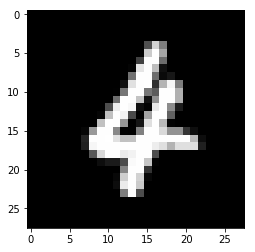

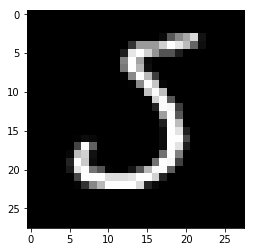

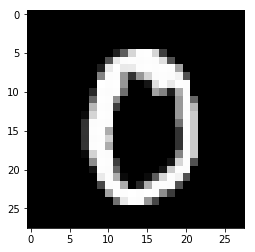

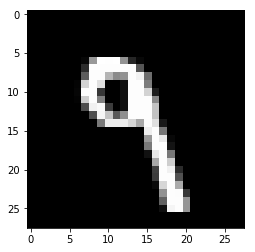

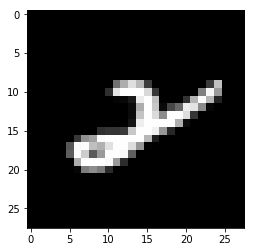

In [25]:
import random

for x in range(0, 5):
    idimg = random.randrange(len(predictions))

    print('Id do dígito selecionado: ', idimg, '\n')

    print('Dígito aprendido: ', int(predictions[idimg]))

    plt.figure(figsize=(4,4))
    plt.imshow(X_test[idimg].reshape((28, 28)))
    print('\n')